# This notebook is about learning data analysis using Python #
## Focus is to prepare, visualize and assess a model to get insigh from the data ##

### Step 1 : importing and doing an initial formatting on the data ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


we will now develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

### Step 2 : Linear regression and multiple linear regression ###

#### a/ Linear regression ####

Simple Linear Regression is a method to help us understand the relationship between two variables:
The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

Linear function:
    
𝑌ℎ𝑎𝑡 = 𝑎+𝑏𝑋

'𝑌' is the r𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒.  
'𝑋' is the p𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒.  
'a' refers to the intercept of the regression line 0, in other words: the value of Y when X is 0.  
'b' refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit.      

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3]:
# Let's try and example and see how highway-mpg can help us predict car price:

X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
# We can output a prediction this way:

Yhat=lm.predict(X)
print (Yhat[0:5])   

# Check the value of the intercept:

print (lm.intercept_)

# or check the value of the slope:

print(lm.coef_)

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
38423.305858157386
[-821.73337832]


So, the model we get is : price = 38423.31 - 821.73 x highway-mpg

In [5]:
# Let's now repeat the same operation with engine size:

X = df[['engine-size']]
Y = df['price']
lm.fit(X,Y)

print (lm.intercept_)
print (lm.coef_)

-7963.338906281049
[166.86001569]


So, the model we get is : price = 166.86 x engine-size -7963.34

#### b/ Multiple linear regression ####

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. 

𝑌ℎ𝑎𝑡 = 𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

In [6]:
# Let's develop a model using some variables (that might have an impact on price) as the predictor variables.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
print (lm.intercept_)
print (lm.coef_)

-15806.624626329198
[53.49574423  4.70770099 81.53026382 36.05748882]


So, the model we get is : price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

### Step 3 : Model Evaluation using Visualization ###

In [7]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### a/ Regression plot ####

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.  

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0, 48278.57088648141)

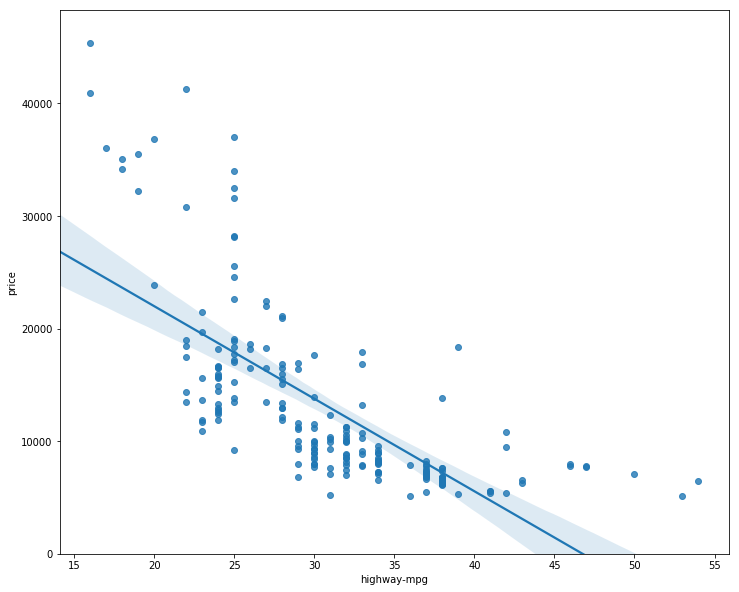

In [8]:
# Let's visualize Horsepower as potential predictor variable of price.

width = 12
height = 10
plt.figure(figsize=(width, height)) # set fig size according to width and height

sns.regplot(x="highway-mpg", y="price", data=df) # set coordinates x & y and take data from df

plt.ylim(0,) # set y axis (price) min value to 0



We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.  
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. 

(0, 47422.919330307624)

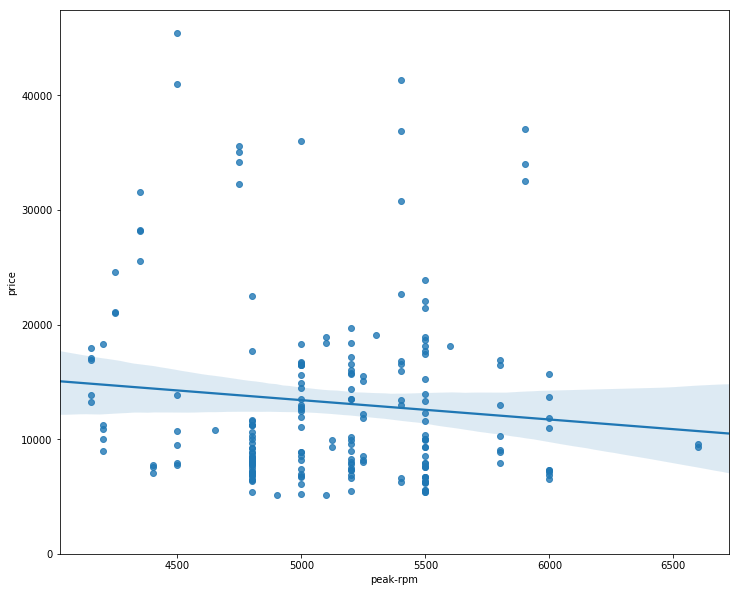

In [9]:
# Let's compare this plot to the regression plot of "peak-rpm".

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

#### b/ Residual plot ####

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

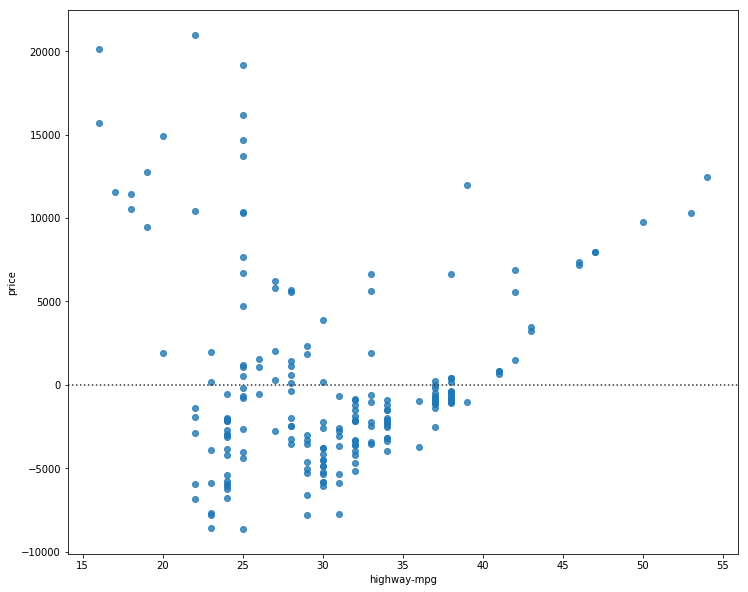

In [10]:
# Let's see an example with the highway-mpg variable

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

### Step 4 : Polynomial regression and pipelines ###

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.  
It can be quadratic (2nd order), cubic (3rd order) or have a higher order: 𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3...

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [33]:
# Let's create a function to plot the data

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100) # Return evenly spaced numbers over a specified interval.
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable,'.', x_new, y_new) # '.' shows dots for the data points
    plt.title('Polynomial Fit with Matplotlib for Price / Highway-mpg') # title of the graph
    plt.xlabel(Name) # x axis label takes the value of "Name" that is passed in the function
    plt.ylabel('Price of Cars') # Set the y axis label
    plt.show() 
    plt.close()
    
# We define the variables    
    
x = df['highway-mpg']
y = df['price']    


In [34]:
# Here we use a polynomial of the 3rd order (cubic)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


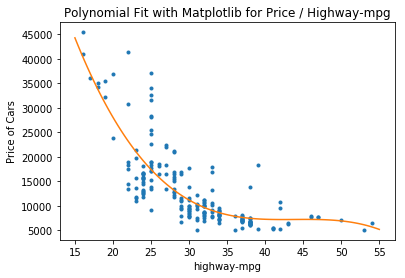

In [35]:
# Let's finally plot the function

PlotPolly(p, x, y, 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

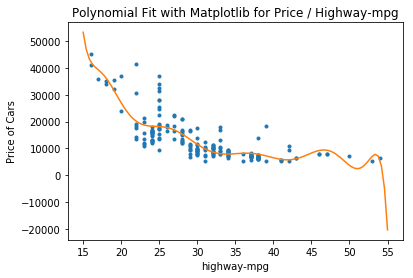

In [37]:
# We can replicate the same analysis with a more complex polynomial:
    
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
PlotPolly(p1,x,y, 'highway-mpg')